In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

2022-09-16 12:31:32.660221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 12:31:32.799217: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 12:31:33.336942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-16 12:31:33.336987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
data = pd.read_csv("../../datasets/TON_IoT-Datasets/Train_Test_datasets/Train_Test_Network_dataset/Train_Test_Network.csv")

In [4]:
data.pop('type')
data.pop('ts')
data_labels = data.pop('label')

In [5]:
#cat_indexs = [0, 1, 2, 3, 4, 5, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41]
num_indexs = [6, 7, 8, 10, 11, 12, 13, 14, 33, 34]
#col_names = np.array(data.columns[cat_indexs])

In [6]:
data_features = data.iloc[:,num_indexs]
#data_features = pd.get_dummies(data, columns = col_names)

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_features, data_labels, test_size=0.33)

In [8]:
def create_keras_model():
  initializer=tf.keras.initializers.GlorotUniform(seed= 16)
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(len(data_features.columns),)),
      tf.keras.layers.Dense(128, activation="relu", kernel_initializer=initializer),
      tf.keras.layers.Dense(64, activation="relu", kernel_initializer=initializer),
      tf.keras.layers.Dense(64, activation="relu", kernel_initializer=initializer),
      tf.keras.layers.Dense(32, activation="relu", kernel_initializer=initializer),
      #tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      #tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dropout(0.15),
      #tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu", kernel_initializer=initializer),
      tf.keras.layers.Dense(2, activation="relu", kernel_initializer=initializer),
      #tf.keras.layers.Dense(2, activation="relu"),
      #tf.keras.layers.Dense(32, activation="relu"),
      #tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer=initializer)
      #tf.keras.layers.Softmax()
  ])



In [9]:
model = create_keras_model()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, mode="min")
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = [tf.keras.metrics.BinaryAccuracy()]
loss = [tf.keras.losses.BinaryCrossentropy()]
model.compile(optimizer=opt, loss=loss, metrics = metrics)

history = model.fit(X_train, y_train, epochs=100, batch_size=128,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    callbacks=[early_stopping], verbose=True
                    )

Epoch 1/100


2022-09-16 12:31:35.989094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 12:31:36.819098: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9633 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5
2022-09-16 12:31:36.819746: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9293 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


2414/2414 [==============================] - 6s 2ms/step - loss: 0.7169 - binary_accuracy: 0.6525 - val_loss: 0.6671 - val_binary_accuracy: 0.6495
Epoch 2/100
2414/2414 [==============================] - 5s 2ms/step - loss: 0.6528 - binary_accuracy: 0.7200 - val_loss: 0.5399 - val_binary_accuracy: 0.7777
Epoch 3/100
2414/2414 [==============================] - 5s 2ms/step - loss: 0.5233 - binary_accuracy: 0.7851 - val_loss: 0.4991 - val_binary_accuracy: 0.8156
Epoch 4/100
2414/2414 [==============================] - 5s 2ms/step - loss: 0.4894 - binary_accuracy: 0.8054 - val_loss: 0.4760 - val_binary_accuracy: 0.8161
Epoch 5/100
2414/2414 [==============================] - 5s 2ms/step - loss: 0.4680 - binary_accuracy: 0.8140 - val_loss: 0.4494 - val_binary_accuracy: 0.8154
Epoch 6/100
2414/2414 [==============================] - 5s 2ms/step - loss: 0.4432 - binary_accuracy: 0.8256 - val_loss: 0.4320 - val_binary_accuracy: 0.8353
Epoch 7/100
2414/2414 [==============================] - 5

In [10]:
def save_stats(predictions, labels, print_sc=False):

  acc = "{:.4f}".format(accuracy_score(labels, predictions))
  prec = "{:.4f}".format(precision_score(labels, predictions, zero_division=0))
  rcl = "{:.4f}".format(recall_score(labels, predictions, zero_division=0))
  f1 = "{:.4f}".format(f1_score(labels, predictions, zero_division=0))
  roc = "{:.4f}".format(roc_auc_score(labels, predictions))

  if print_sc:
    print("Accuracy = " + acc)
    print("Precision = " + prec)
    print("Recall = " + rcl) #sensitivity
    print("F1 = " + f1)
    print("ROC_AUC = " + roc)

  return (acc + " " + prec + " " + rcl + " " + f1 + " " + roc)

In [11]:
preds = model.predict(X_test)
out = save_stats(np.round(preds, decimals=0), y_test.astype(int), True)

4755/4755 [==============================] - 4s 785us/step
Accuracy = 0.8369
Precision = 0.9847
Recall = 0.5431
F1 = 0.7000
ROC_AUC = 0.7693


In [12]:
prec = precision_score(y_test.astype(int), np.round(preds, decimals=0), zero_division=0)
rcl = recall_score(y_test.astype(int), np.round(preds, decimals=0), zero_division=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


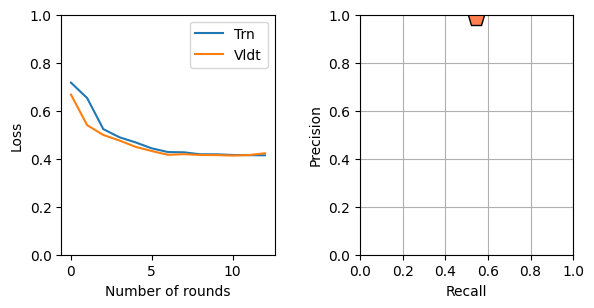

In [35]:
'''PR CURVE'''

figure, axis = plt.subplots(1, 2)

'''PLOT 1'''
axis[0].plot(history.history['loss'])
axis[0].plot(history.history['val_loss'])
axis[0].legend(["Trn", "Vldt"], loc='upper right')
axis[0].set_xlabel("Number of rounds")
axis[0].set_ylabel("Loss")
axis[0].set_ylim(0, 1)



'''PLOT 2'''
axis[1].plot(rcl, prec, marker="p", markersize=12, markeredgecolor="black", markerfacecolor="coral")
axis[1].set_ylabel('Precision')
axis[1].set_xlabel('Recall')
axis[1].set_xlim(0, 1)
axis[1].set_ylim(0, 1)
axis[1].grid()


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.6,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('toy_results.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


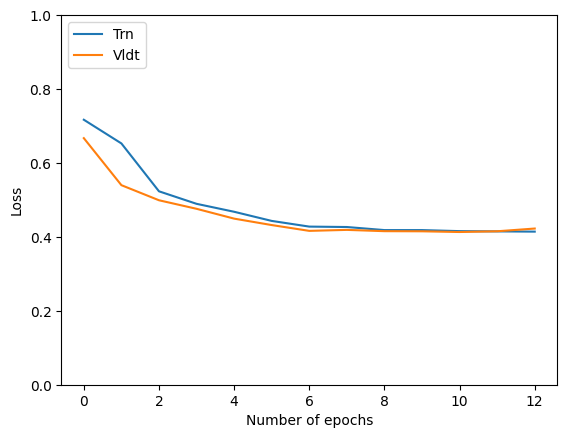

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Trn', 'Vldt'], loc='upper left')
plt.ylim(0,1)



plt.savefig('toy_loss.eps', format='eps')
plt.show()

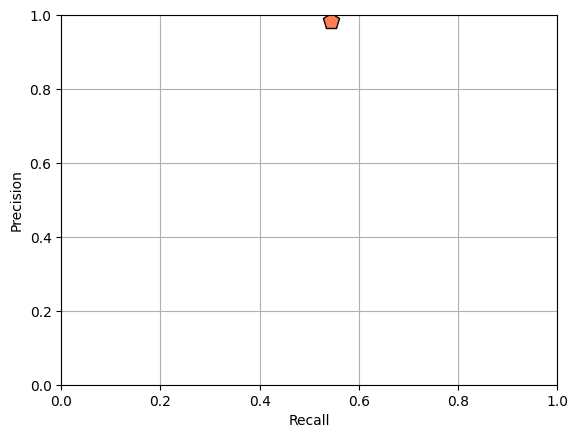

In [37]:
    '''PLOT PR'''
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid()
    plt.plot(rcl, prec, marker="p", markersize=12, markeredgecolor="black", markerfacecolor="coral")
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig('toy_pr.eps', format='eps')
    plt.show()